Сегодня мы займёмся анализом данных опроса, проведённого на одном очень популярном среди Data Scientist'ов сайте. `Файл multipleChoiceResponses.csv` содержит данные ответов на закрытые вопросы. В файле `freeformResponses.csv` лежат данные открытых вопросов.

* Загрузка и разведывательный анализ
    * Загрузите csv файлы в кодировке ISO-8859-1. Для удобства дальнейшего анализа советую совместить их в одну таблицу ([`pd.concat`](https://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-with-mixed-ndims))
    * Посчитайте размерность данных и количество пропущенных значений в каждой переменной.
    * Сравните распределения зарплат `Salary` по гендеру `GenderSelect`. Учтите, что в переменной `Salary` могут быть явные выбросы, указавшие нереалистично большую ЗП. Отсейте эти выбросы перед сравнением, удалив, например, из базы ответы людей, зарабатывающих более 1 млн. **Здесь и далее используйте эти отфильтрованные данные**.
    * Проранжируйте навыки машинного обучения по популярности (`MLSkillsSelect`). Учтите, что респондент мог указать несколько навыков.
    * Проанализируйте переменную, в которой закодировано удовлетворение работой `JobSatisfaction`. Для этого вначале переведите её в числовую форму (например, при помощи методов [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) и [`to_numeric`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) следующим образом: 10 - Highly Satisfied' в 10,'1 - Highly Dissatisfied' в 1,'I prefer not to share' в np.NaN или None).
    * На основе переменной `WorkToolsSelect` я создал новую переменную `Python_R`, значения которой зависит от того, каким инструментом пользуется респондент. Сравните удовлетворение работой и зарплату сради тех, кто пользуется Python, R и обоими инструментами. Кто зарабатывает / наслаждается работой больше?
    
* Регрессионная модель
	* На обучающей выборке постройте регрессионную модель, показывающую зависимость между доходом (зависимая переменная) и возрастом. Визуализируйте эту зависимость. На сколько изменяется доход при изменении возраста на 1 год?
	* Оцените качество модели на основе предсказаний по тестовой выборке по помощи стандартных метрик качества для регрессионных моделей.
	* Добавьте в модель переменную, в которой закодирован используемый язык гендер респондента `GenderSelect`. Как изменилось качество?

* Классификация текстов
	* Сделайте препроцессинг текстов в поле `InterestingProblemFreeForm` (токенизацию, стемминг или лемматизацию, удаление стоп-слов).
	* На обучающей выборке постройте модель классификации текста, которая бы классифицировала выбор языка программирования `WorkToolsSelect` по их интересам `InterestingProblemFreeForm`.
	* Оцените качество работы модели по помощи стандартных метрик качества для алгоритмов классификации. Какие классы удалось предсказать хорошо, а какие — не очень.
    
Использование всяких дополнительных ухищрений для для получения более хорошей модели не обязательно, но в случае наличия — зачтётся.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [23]:
response['JobSatisfaction'] = pd.to_numeric(response['JobSatisfaction'].replace({
    '10 - Highly Satisfied': '10',
    '1 - Highly Dissatisfied': '1',
    'I prefer not to share': np.NaN
}))

In [41]:
response[['JobSatisfaction', 'Salary', "Age", "WorkToolsSelect"]].corr()

,JobSatisfaction,Salary,Age
JobSatisfaction,1.000000,0.103783,0.308876
Salary,0.103783,1.000000,-0.040362
Age,0.308876,-0.040362,1.000000


In [45]:
response = response[response["Salary"]>1000000]

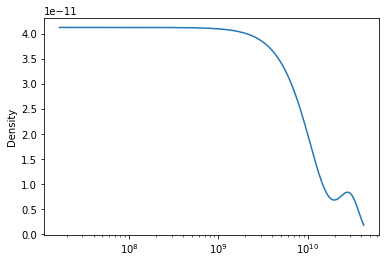

In [38]:
response["Salary"].plot(kind="kde", logx=True)

In [14]:
response["MLSkillsSelect"].unique()

array([ 'Computer Vision,Natural Language Processing,Supervised Machine Learning (Tabular Data),Time Series',
       'Computer Vision,Supervised Machine Learning (Tabular Data),Unsupervised Learning',
       'Adversarial Learning,Computer Vision,Natural Language Processing',
       ...,
       'Adversarial Learning,Outlier detection (e.g. Fraud detection),Recommendation Engines,Time Series',
       'Natural Language Processing,Outlier detection (e.g. Fraud detection),Speech Recognition',
       'Adversarial Learning,Speech Recognition,Supervised Machine Learning (Tabular Data),Time Series,Unsupervised Learning'], dtype=object)

In [153]:
response.to_csv("multipleChoiceResponses.csv")

In [154]:
response.shape, free.shape

((16716, 230), (16716, 62))

In [152]:
free.to_csv("free.csv")

In [166]:
response = pd.read_csv(
    'kaggle/kaggle-survey-2017/multipleChoiceResponses.csv',
    encoding='ISO-8859-1')
free=pd.read_csv('kaggle/kaggle-survey-2017/freeformResponses.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
response = pd.read_csv(
    'multipleChoiceResponses.csv',
    encoding='ISO-8859-1')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,230) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=resul

In [136]:
response

,Unnamed: 0,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,Salary,R_Python
0,0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.000,R
1,1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,64184.800,NaN
2,2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,20882.400,NaN
3,3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1483.900,both
4,4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36634.400,both
5,5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.000,Python
6,6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.000,R
7,7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,...,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,916.400,NaN
8,8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10858.848,NaN
9,9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53352.000,both


In [170]:
df = pd.concat([response, free], axis=1)

In [176]:
df.sample(n=10000).to_msgpack("data")

In [145]:
response.shape, free.shape

((16716, 228), (16716, 62))

In [7]:
response.shape

(16716, 228)

In [8]:
free.shape

(16716, 62)

In [167]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('kaggle/kaggle-survey-2017/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
response['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

In [59]:
df["InterestingProblemFreeForm"]

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5            self-learning personalized recommender system
6                                                       no
7        I'll try to make a machine that can help in fi...
8                                         Cancer detection
9                                               Healthcare
10                                                     NaN
11                          deep learning applied to games
12                                                     NaN
13                                                     NaN
14                                                     NaN
15                                                     NaN
16                                                     N

In [58]:
free.isnull().sum().sort_values()

WorkLibrariesFreeForm                                12221
InterestingProblemFreeForm                           12261
ImpactfulAlgorithmFreeForm                           12369
PersonalProjectsChallengeFreeForm                    13209
DataScienceIdentityFreeForm                          14299
PastJobTitlesFreeForm                                14622
CurrentJobTitleFreeForm                              15573
BlogsPodcastsNewslettersFreeForm                     15603
WorkMLTeamSeatFreeForm                               15788
EmployerIndustryOtherFreeForm                        15790
MajorFreeForm                                        15907
MLTechniquesFreeform                                 15963
KaggleMotivationFreeForm                             15970
MLSkillsFreeForm                                     16050
WorkToolsFreeForm1                                   16052
WorkDataTypeFreeForm                                 16055
EmployerSearchMethodOtherFreeForm                    160

In [116]:
import nltk
nltk.download("punkt") # Загружаем модуль для токенизации английских текстов

nltk.download("snowball_data")
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

import re
def remove_white_and_punct(tokens):
    tokens = filter(lambda token: not bool(re.match("^[\s\W]+$", token)), tokens)
    return list(tokens)

from nltk.corpus import stopwords

nltk.download("stopwords")

from nltk import word_tokenize

df.dropna(subset=["InterestingProblemFreeForm"], inplace=True)
df["preprocessed"] = df["InterestingProblemFreeForm"].apply(str.lower)\
    .apply(word_tokenize)\
    .apply(remove_white_and_punct)\
    .apply(lambda tokens_list: [stemmer.stem(token) for token in tokens_list])

[nltk_data] Downloading package punkt to /Users/hun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     /Users/hun/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
from collections import Counter


c = Counter()
for _id, doc in df["preprocessed"].iteritems():
    c.update(doc)

most_freq = [w for w, c in c.most_common(30)]
most_rare = [w for w, c in c.items() if c < 6]
stopw = set(most_freq + most_rare + stopwords.words("english"))

In [118]:
df["preprocessed"] = df["preprocessed"].apply(
    lambda tokens: [token for token in tokens if token not in stopw])

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform([" ".join(doc) for _id, doc in df["preprocessed"].iteritems()])

In [168]:
def r_python(s):
    if type(s) == str:
        if ("Python" in s) & ("R" in s):
            return "both"
        if ("Python" in s) & ("R" not in s):
            return "Python"
        if ("Python" not in s) & ("R" in s):
            return "R"
        if ("Python" not in s) & ("R" not in s):
            return None
    else: return None

In [169]:
response["R_Python"] = response["WorkToolsSelect"].apply(r_python)

In [106]:
df = df[["R_Python", "InterestingProblemFreeForm"]].dropna()

In [109]:
df.shape

(1905, 2)

In [107]:
df["R_Python"] = pd.factorize(df["R_Python"])[0]

In [122]:
df["R_Python"].value_counts()

2    925
0    652
1    328
Name: R_Python, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_features, df["R_Python"], test_size=0.3, random_state=42)

In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)

predicted = mnb.predict(features_test)

print(classification_report(labels_test, predicted))

             precision    recall  f1-score   support

          0       0.34      0.23      0.28       198
          1       0.03      0.01      0.02        98
          2       0.48      0.70      0.56       276

avg / total       0.35      0.42      0.37       572



In [160]:
df["Salary"].dtype

dtype('float64')

In [173]:
a = pd.read_csv("data.csv.gz", compression="gzip", sep="\t")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,230,231,232,233,234,235,236,237,238,239,240,241,242,244,246,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,

In [177]:
df["GenderSelect"].unique()

array(['Non-binary, genderqueer, or gender non-conforming', 'Female',
       'Male', 'A different identity', nan], dtype=object)